In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import fastai
from fastai.vision import *
#from fastai.datasets import *
from fastai.metrics import error_rate
from os import listdir
from pathlib import Path

In [4]:
fastai.__version__

'1.0.61'

In [5]:
bs = 64
bs = 8   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [6]:
from fastai.datasets import untar_data

In [9]:
path = Path('E:\Data\Raw\cats_vs_dogs_dataset-cleaned')
path

WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned')

In [10]:
path.ls()

[WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/desktop.ini'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/models'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/validation')]

In [11]:
train_cats_img = path/'training'/'cats'

In [12]:
fnames = get_image_files(train_cats_img)
fnames[:5]

[WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training/cats/cat.1.jpg'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training/cats/cat.10.jpg'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training/cats/cat.100.jpg'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training/cats/cat.1000.jpg'),
 WindowsPath('E:/Data/Raw/cats_vs_dogs_dataset-cleaned/training/cats/cat.1001.jpg')]

In [13]:
data = ImageDataBunch.from_folder(path, train='training', valid='validation', size=244)

C:\Users\Julius\anaconda3\envs\pyt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Julius\anaconda3\envs\pyt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defaul

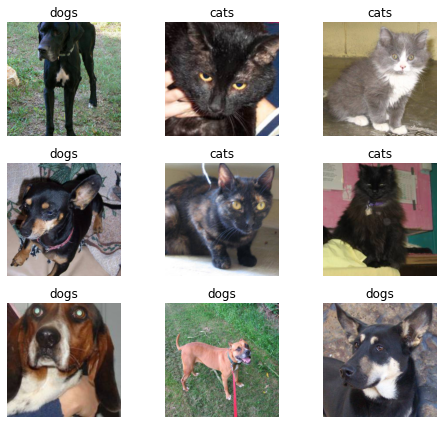

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['cats', 'dogs']


(2, 2)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
#learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.099999,0.071701,0.017000,02:33
1,0.060001,0.073675,0.016000,02:27
2,0.034727,0.052422,0.012000,02:27
3,0.017018,0.051100,0.013500,02:27


In [16]:
learn.save('stage-1_cats_vs_dogs')

# Results

In [17]:
learn.load('stage-1_cats_vs_dogs')

C:\Users\Julius\anaconda3\envs\pyt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Learner(data=ImageDataBunch;

Train: LabelList (8000 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
cats,cats,cats,cats,cats
Path: E:\Data\Raw\cats_vs_dogs_dataset-cleaned;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
cats,cats,cats,cats,cats
Path: E:\Data\Raw\cats_vs_dogs_dataset-cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

C:\Users\Julius\anaconda3\envs\pyt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


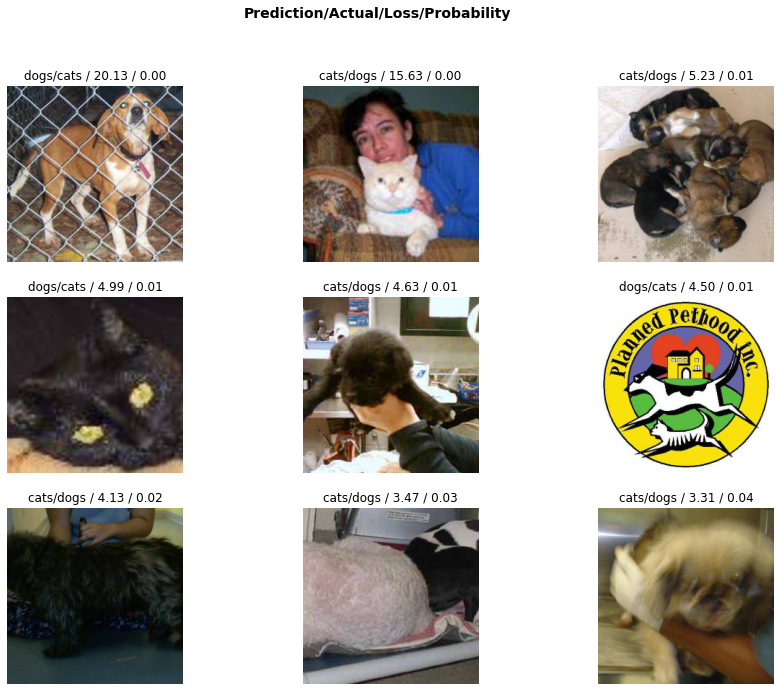

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

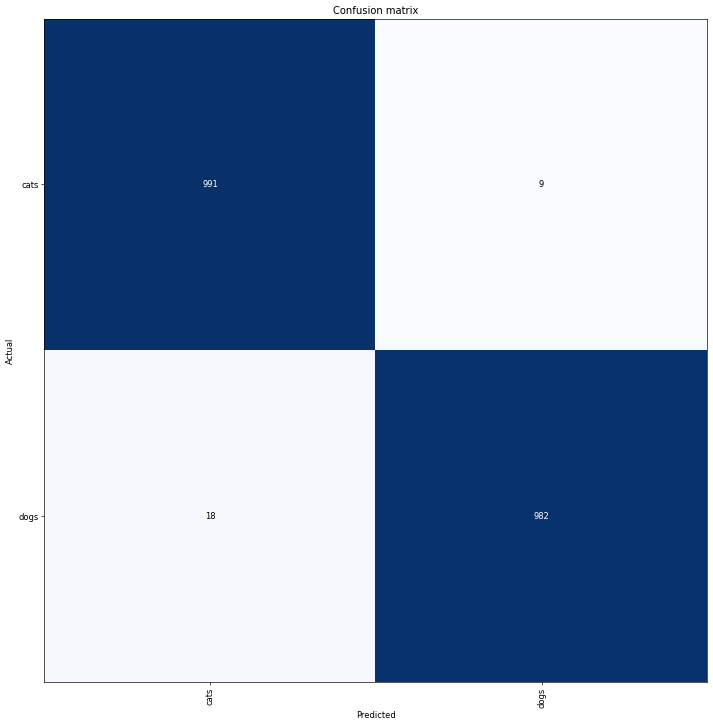

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Clean data

In [25]:
from fastai.widgets import *

In [23]:
losses, idxs = interp.top_losses()
top_loss_path = data.valid_ds.x[idxs]

In [27]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [28]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [29]:
df = pd.read_csv(path/'cleaned.csv', header='infer')